In [2]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train , y_train) ,(X_test ,y_test) = datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 57s 0us/step


(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [16]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [17]:
y_train= y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [13]:
classes = ["airplane" , "automobile" ,"bird","cat","deer","dog","frog","horse","ship","truck"]

In [19]:
classes[9]

'truck'

In [22]:
def plot_sample(X,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

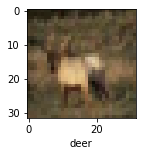

In [26]:
plot_sample(X_train ,y_train , 3)

In [29]:
X_train = X_train / 255
X_test = X_test / 255

In [33]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation = 'relu'),
    layers.Dense(3000,activation = 'relu'),
    layers.Dense(10,activation = 'sigmoid')
])

ann.compile(optimizer="SGD",
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 95s 61ms/step - loss: 1.8498 - accuracy: 0.3375
Epoch 2/5
1563/1563 [==============================] - 94s 60ms/step - loss: 1.6526 - accuracy: 0.4170
Epoch 3/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.5652 - accuracy: 0.4473
Epoch 4/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.5059 - accuracy: 0.4676
Epoch 5/5
1563/1563 [==============================] - 97s 62ms/step - loss: 1.4539 - accuracy: 0.4864


In [35]:
ann.evaluate(X_test ,y_test)

313/313 [==============================] - 5s 17ms/step - loss: 1.5006 - accuracy: 0.4615


[1.5006154775619507, 0.46149998903274536]

In [37]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.66      0.34      0.45      1000
           1       0.59      0.60      0.59      1000
           2       0.44      0.22      0.30      1000
           3       0.37      0.30      0.33      1000
           4       0.39      0.44      0.41      1000
           5       0.50      0.23      0.32      1000
           6       0.40      0.72      0.51      1000
           7       0.64      0.45      0.53      1000
           8       0.38      0.85      0.52      1000
           9       0.59      0.46      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.49      0.46      0.45     10000
weighted avg       0.49      0.46      0.45     10000



In [45]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters = 32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters = 64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])

In [48]:
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [50]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 24s 16ms/step - loss: 1.4621 - accuracy: 0.4733
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 1.1104 - accuracy: 0.6127
Epoch 3/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9853 - accuracy: 0.6564
Epoch 4/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.9006 - accuracy: 0.6863
Epoch 5/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8361 - accuracy: 0.7087
Epoch 6/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7917 - accuracy: 0.7256
Epoch 7/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7365 - accuracy: 0.7453
Epoch 8/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.6993 - accuracy: 0.7578
Epoch 9/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.6681 - accuracy: 0.7685
Epoch 10/10
1563/1563 [==============================] - 25s 16m

In [51]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.9241 - accuracy: 0.6931


[0.9240586757659912, 0.6930999755859375]

In [54]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

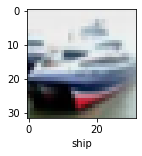

In [55]:
plot_sample(X_test,y_test,1)

In [58]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.58629152e-04, 2.59466779e-05, 2.63691461e-03, 8.50758076e-01,
        6.27507083e-03, 7.26275817e-02, 1.94317475e-02, 4.89759084e-04,
        4.74462211e-02, 5.01956310e-05],
       [2.87175016e-03, 2.63903732e-03, 7.13465795e-07, 1.21487028e-06,
        1.04356286e-06, 5.69495384e-09, 1.04581144e-08, 2.76600209e-09,
        9.94358003e-01, 1.28220345e-04],
       [4.22227718e-02, 5.60302883e-02, 8.45263130e-05, 2.37991698e-02,
        6.48616173e-04, 9.09183815e-04, 1.74654211e-04, 1.03113172e-03,
        8.74306500e-01, 7.93187995e-04],
       [5.21820307e-01, 6.05465844e-03, 6.38508517e-03, 1.62214208e-02,
        8.45949724e-02, 7.07921979e-04, 6.33371389e-03, 9.19151062e-04,
        3.56594771e-01, 3.68089997e-04],
       [2.12753577e-07, 2.56150324e-05, 1.53364055e-02, 8.19575135e-03,
        3.47123966e-02, 7.35470676e-04, 9.40888166e-01, 3.98117709e-06,
        9.53870112e-05, 6.72430360e-06]], dtype=float32)

In [63]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [64]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

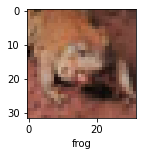

In [75]:
plot_sample(X_test,y_test,5)

In [76]:
classes[y_classes[5]]

'frog'

In [78]:
print("Classification Report: \n",classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.64      0.71      1000
           1       0.88      0.75      0.81      1000
           2       0.67      0.54      0.60      1000
           3       0.47      0.55      0.50      1000
           4       0.56      0.71      0.63      1000
           5       0.63      0.59      0.61      1000
           6       0.75      0.79      0.77      1000
           7       0.71      0.76      0.73      1000
           8       0.83      0.78      0.81      1000
           9       0.75      0.83      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

